#### Пропуски заменены средними значениями по столбцу. Добавлен новый признак manhattan_dist с дистанцией от конкретного объекта до Манхэттена. Обработка категориальных признаков сделана с помощью OneHotEncoder. Произведено шкалирование с использованием StandartScaler и RobastScaler. При шкалировании с помощью RobustScaler удалось добиться незначительного улучшения точности модели.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [45]:
data = pd.read_csv('AB_NYC_2019.csv')

In [46]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [48]:
data.drop(columns = ['id', 'name', 'host_id', 'host_name', 'last_review'], axis = 1, inplace = True) 

In [49]:
data = data.fillna(data.mean())

C:\Users\099\AppData\Local\Temp/ipykernel_8156/476127175.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


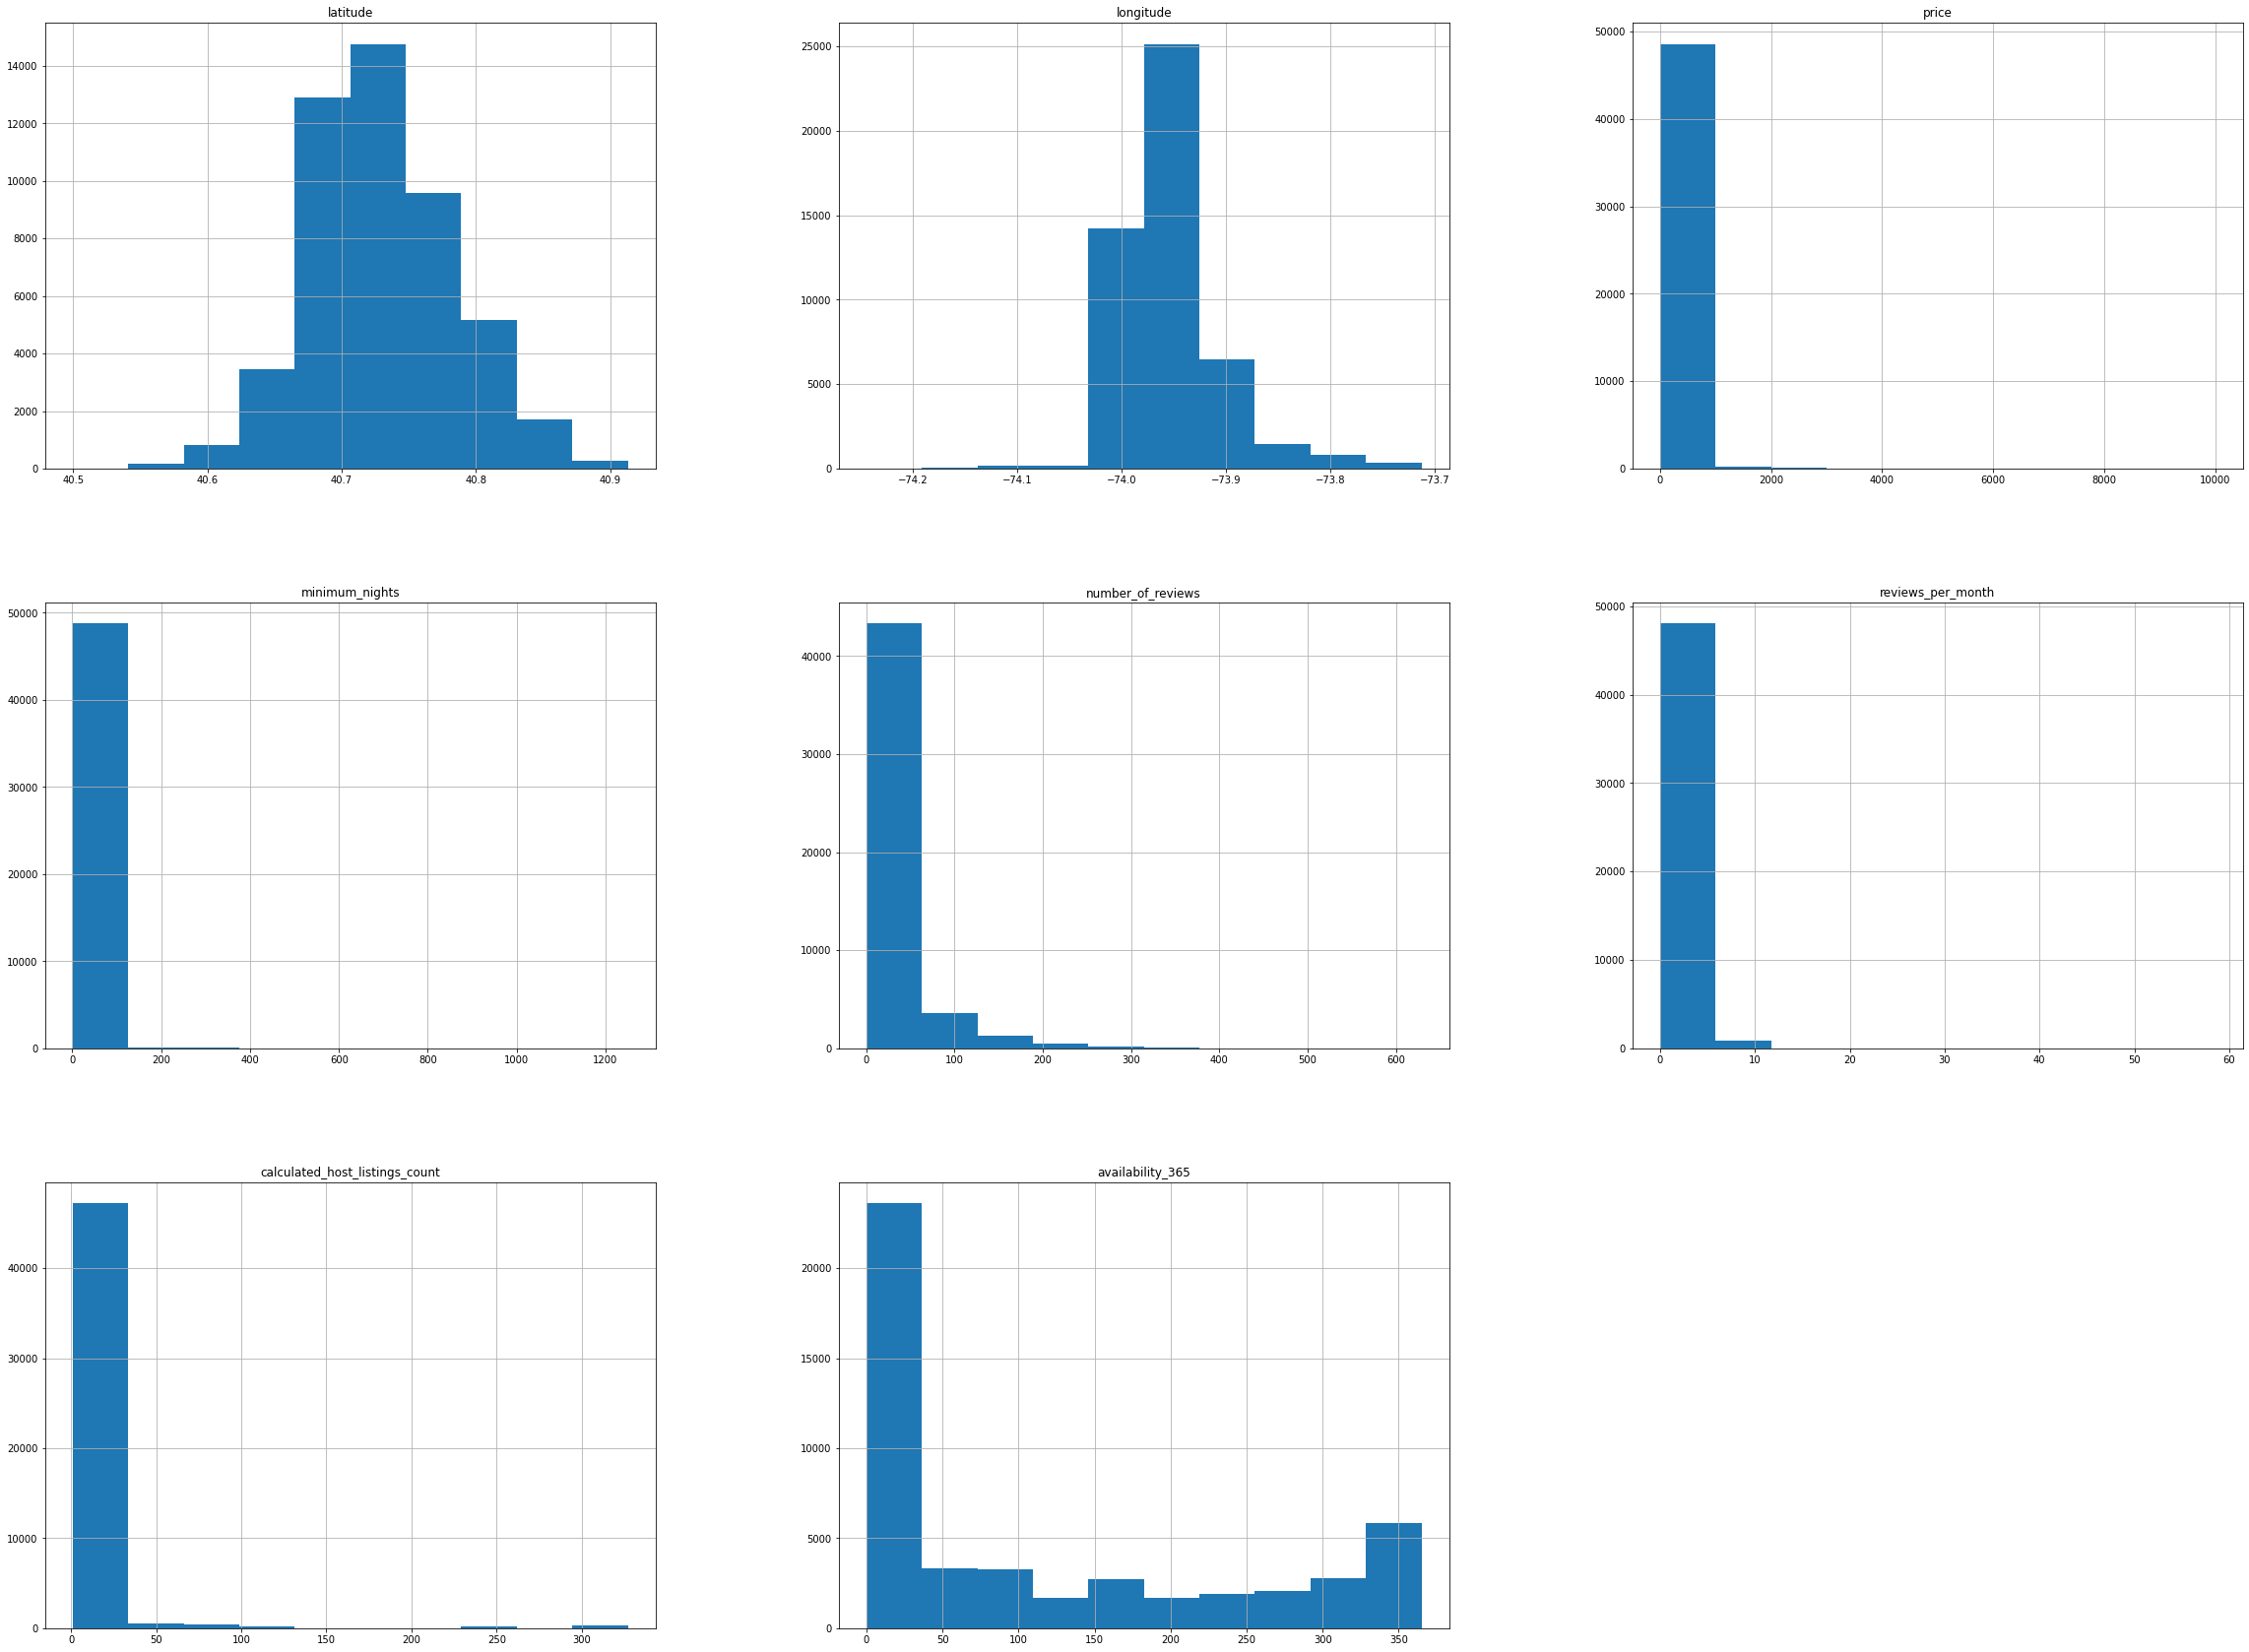

In [50]:
data.hist(figsize=(40,30));

C:\Users\099\AppData\Local\Temp/ipykernel_8156/4216924255.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f');


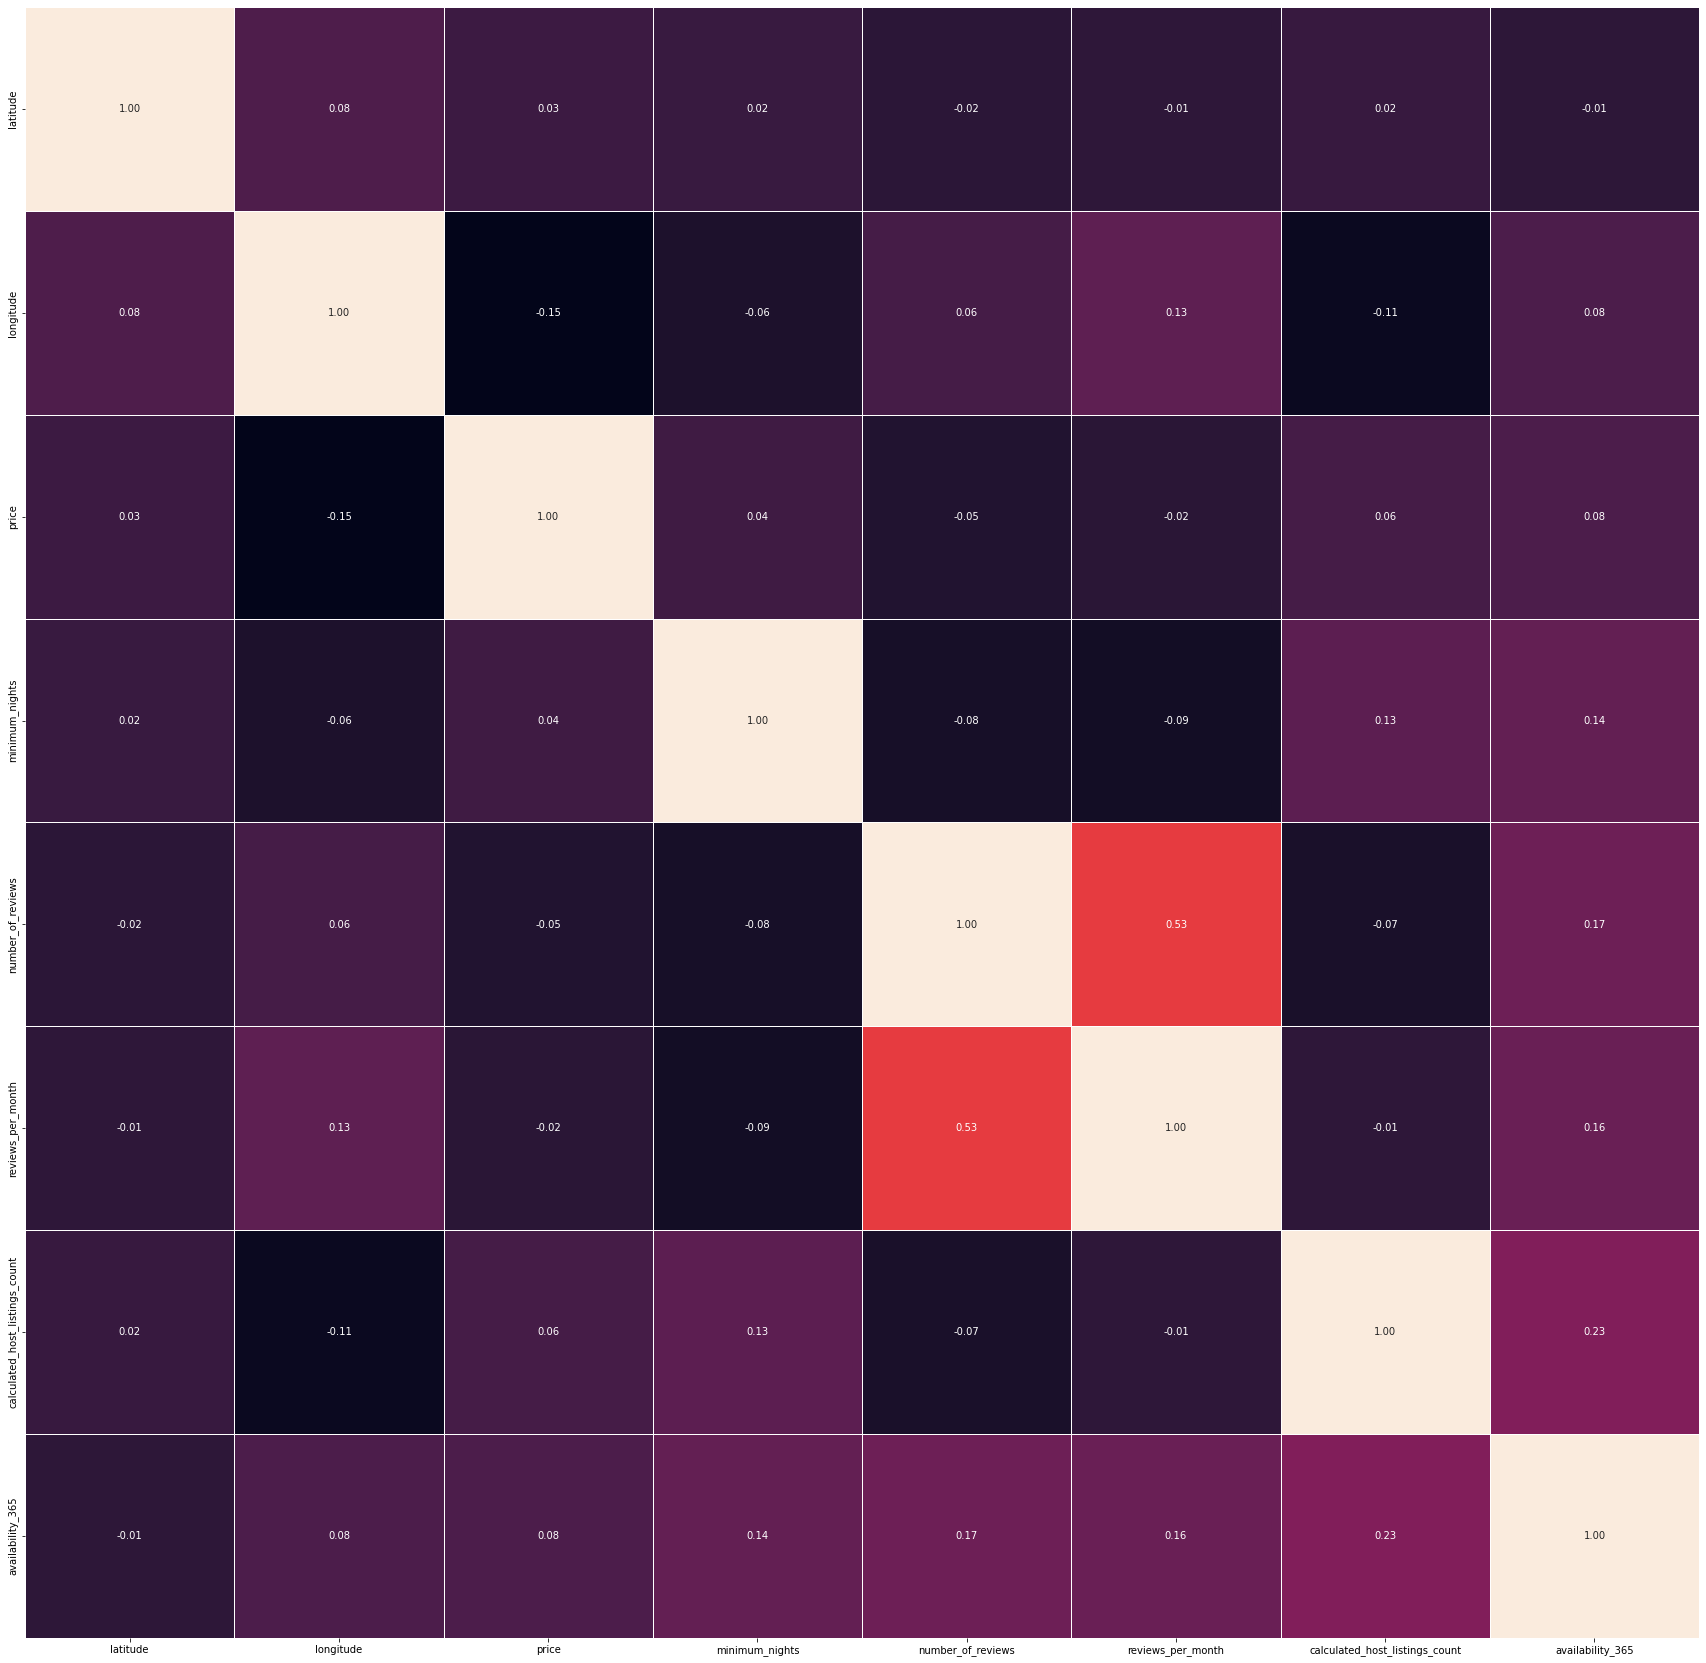

In [51]:
plt.figure(figsize=(30, 30));
sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f');
plt.show();

In [52]:
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


In [53]:
data['manhattan_dist'] = (data['latitude'] - 40.3874)**2 + (data['longitude'] + 70.9662)**2

In [54]:
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,manhattan_dist
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365,9.104705
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355,9.239846
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365,9.032554
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194,9.050051
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0,9.036245


In [55]:
from category_encoders import OneHotEncoder
enc = OneHotEncoder()
enc.fit_transform(data[['neighbourhood_group', 'neighbourhood', 'room_type']]).head()

,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,neighbourhood_group_5,neighbourhood_1,neighbourhood_2,neighbourhood_3,neighbourhood_4,neighbourhood_5,...,neighbourhood_215,neighbourhood_216,neighbourhood_217,neighbourhood_218,neighbourhood_219,neighbourhood_220,neighbourhood_221,room_type_1,room_type_2,room_type_3
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [56]:
data = data.drop(['neighbourhood_group', 'neighbourhood', 'room_type'], axis = 1).join(enc.fit_transform(data[['neighbourhood_group', 'neighbourhood', 'room_type']], axis = 0))

In [57]:
data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,manhattan_dist,neighbourhood_group_1,...,neighbourhood_215,neighbourhood_216,neighbourhood_217,neighbourhood_218,neighbourhood_219,neighbourhood_220,neighbourhood_221,room_type_1,room_type_2,room_type_3
0,40.64749,-73.97237,149,1,9,0.210000,6,365,9.104705,1,...,0,0,0,0,0,0,0,1,0,0
1,40.75362,-73.98377,225,1,45,0.380000,2,355,9.239846,0,...,0,0,0,0,0,0,0,0,1,0
2,40.80902,-73.94190,150,3,0,1.373221,1,365,9.032554,0,...,0,0,0,0,0,0,0,1,0,0
3,40.68514,-73.95976,89,1,270,4.640000,1,194,9.050051,1,...,0,0,0,0,0,0,0,0,1,0
4,40.79851,-73.94399,80,10,9,0.100000,1,0,9.036245,0,...,0,0,0,0,0,0,0,0,1,0


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['price'], axis=1), data['price'], test_size=0.30, random_state=42
)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train_scaled1 = scaler.fit_transform(X_train)
X_test_scaled1 = scaler.transform(X_test)

### Обучение с использованием шкалирования StandartScaler

In [61]:
from sklearn.linear_model import Ridge

model = Ridge(alpha = 100)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))

print("Test R2 = %.4f" % r2_score(y_test, y_pred))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred))

Test RMSE = 185.1541
Train RMSE = 241.1036
Test MAE = 69.1903
Train MAE = 73.0996
Test R2 = 0.1512
Train R2 = 0.1067


In [62]:
from sklearn.linear_model import Lasso

model = Lasso(alpha = 100)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))

print("Test R2 = %.4f" % r2_score(y_test, y_pred))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred))

Test RMSE = 201.0202
Train RMSE = 255.0975
Test MAE = 89.9760
Train MAE = 94.2972
Test R2 = -0.0005
Train R2 = 0.0000


In [63]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha = 0.5,  l1_ratio = 0.5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))

print("Test R2 = %.4f" % r2_score(y_test, y_pred))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred))

Test RMSE = 185.1985
Train RMSE = 241.4939
Test MAE = 67.4394
Train MAE = 71.5273
Test R2 = 0.1508
Train R2 = 0.1038


### Обучение с использованием шкалирования RobustScaler

In [64]:
from sklearn.linear_model import Ridge

model = Ridge(alpha = 100)
model.fit(X_train_scaled1, y_train)
y_pred = model.predict(X_test_scaled1)
y_train_pred = model.predict(X_train_scaled1)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))

print("Test R2 = %.4f" % r2_score(y_test, y_pred))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred))

Test RMSE = 184.9908
Train RMSE = 241.6686
Test MAE = 68.5343
Train MAE = 72.8421
Test R2 = 0.1527
Train R2 = 0.1025


In [65]:
from sklearn.linear_model import Lasso

model = Lasso(alpha = 100)
model.fit(X_train_scaled1, y_train)
y_pred = model.predict(X_test_scaled1)
y_train_pred = model.predict(X_train_scaled1)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))

print("Test R2 = %.4f" % r2_score(y_test, y_pred))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred))

Test RMSE = 200.5945
Train RMSE = 254.7305
Test MAE = 88.8611
Train MAE = 93.0372
Test R2 = 0.0037
Train R2 = 0.0029


In [66]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha = 0.5,  l1_ratio = 0.5)
model.fit(X_train_scaled1, y_train)
y_pred = model.predict(X_test_scaled1)
y_train_pred = model.predict(X_train_scaled1)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))

print("Test R2 = %.4f" % r2_score(y_test, y_pred))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred))

Test RMSE = 188.8096
Train RMSE = 245.0473
Test MAE = 71.7002
Train MAE = 76.1105
Test R2 = 0.1173
Train R2 = 0.0772
